In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
ibov = pd.read_csv('../data/raw/^BVSP.csv', index_col=0, parse_dates=True)
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,43349.0,43349.0,42125.0,42141.0,42141.0,2976300
2016-01-05,42139.0,42534.0,42137.0,42419.0,42419.0,2557200
2016-01-06,42410.0,42410.0,41590.0,41773.0,41773.0,3935900
2016-01-07,41772.0,41772.0,40695.0,40695.0,40695.0,4032300
2016-01-08,40695.0,41218.0,40463.0,40612.0,40612.0,3221600


In [25]:
ibov['^BVSP'] = ibov['Close'].pct_change(1)

In [26]:
index = pd.read_csv('../data/interim/ibovfull.csv', index_col=0, parse_dates=True)

In [31]:
itub = index[index['Name'] == 'ITUB4'].copy()

In [32]:
itub['ITUB4'] = itub['Close'].pct_change(1)

In [33]:
joined = itub[['ITUB4']].join(ibov['^BVSP'])

In [34]:
joined.head()

,ITUB4,^BVSP
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.008357,0.006597
2016-01-06,-0.003946,-0.015229
2016-01-07,-0.019017,-0.025806
2016-01-08,0.000404,-0.002040


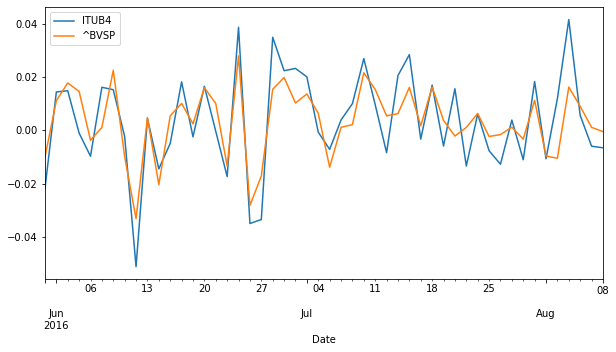

In [35]:
joined.iloc[100:150].plot(figsize=(10, 5));

<AxesSubplot:xlabel='^BVSP', ylabel='ITUB4'>

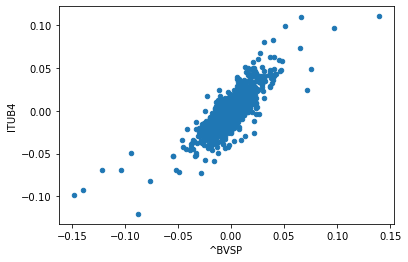

In [36]:
joined.plot.scatter('^BVSP', 'ITUB4')

In [39]:
# make the dataset
joined.dropna(inplace=True)
X = joined[['^BVSP']].to_numpy()
Y = joined[['ITUB4']].to_numpy()

In [40]:
X.shape, Y.shape

((1262, 1), (1262, 1))

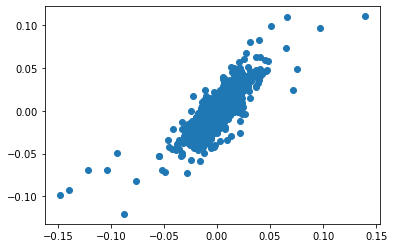

In [41]:
plt.scatter(X, Y);

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

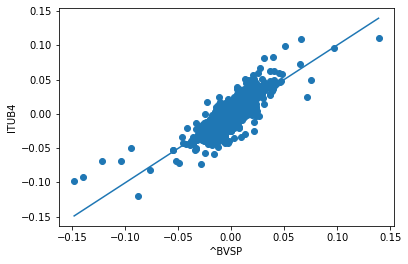

In [46]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y);
plt.xlabel('^BVSP');
plt.ylabel('ITUB4');
plt.plot(X_predict, Y_predict);

In [47]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([-0.00027689]), array([[1.00618058]]))

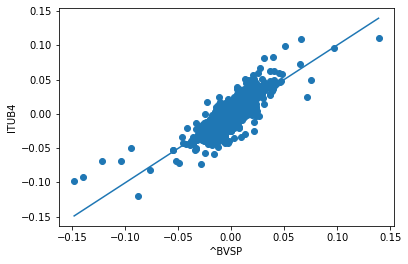

In [48]:
# Manual calulation

Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel('^BVSP');
plt.ylabel('ITUB4');
plt.plot(X_predict, Y_predict);

In [49]:
joined.std()

ITUB4    0.021324
^BVSP    0.017555
dtype: float64

In [50]:
joined['ITUB4'].std() / joined['^BVSP'].std()

1.2146669972121336